## 3표본 다항(비율) 차이분석 ==> chi-square.test

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels

In [2]:
my_df = pd.read_csv('coupon2.csv', skipinitialspace=True)

In [4]:
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

    no  type  category    amount  week
0   42     1       1.0  159000.0   1.0
1  194     1       1.0  154000.0   1.0
2  180     1       1.0  135000.0   1.0
3   47     1       1.0  128000.0   1.0
4  207     1       2.0  129000.0   1.0
      no  type  category  amount  week
295  285     3       NaN     NaN   NaN
296  286     3       NaN     NaN   NaN
297  292     3       NaN     NaN   NaN
298  293     3       NaN     NaN   NaN
299  297     3       NaN     NaN   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
no          300 non-null int64
type        300 non-null int64
category    156 non-null float64
amount      156 non-null float64
week        156 non-null float64
dtypes: float64(3), int64(2)
memory usage: 11.8 KB
None
               no        type    category         amount       week
count  300.000000  300.000000  156.000000     156.000000  156.00000
mean   150.500000    2.073333    2.371795   83358.974359    0.50000
std    

In [5]:
#서브셑 생성
my_df.category.value_counts(normalize=False, sort=False, dropna=False)

 1.0     43
 2.0     45
 4.0     33
 3.0     35
NaN     144
Name: category, dtype: int64

In [8]:
sb_df = my_df[my_df.category.notnull()]
sb_df.head()

,no,type,category,amount,week
0,42,1,1.0,159000.0,1.0
1,194,1,1.0,154000.0,1.0
2,180,1,1.0,135000.0,1.0
3,47,1,1.0,128000.0,1.0
4,207,1,2.0,129000.0,1.0


In [9]:
sb_df.type.value_counts(normalize=False, sort=False)

1    52
2    52
3    52
Name: type, dtype: int64

In [10]:
sb_df.type.value_counts(normalize=True, sort=False)

1    0.333333
2    0.333333
3    0.333333
Name: type, dtype: float64

In [13]:
sb_df.category.value_counts(normalize=False, sort=False)

1.0    43
2.0    45
4.0    33
3.0    35
Name: category, dtype: int64

In [15]:
sb_df.category.value_counts(normalize=True, sort=False)

1.0    0.275641
2.0    0.288462
4.0    0.211538
3.0    0.224359
Name: category, dtype: float64

In [16]:
#레이블 정의
category_lables = {1: 'travel', 2: 'beauty', 3: 'food', 4: 'apparals'}
type_lables = {1: 'discount', 2: 'mileage', 3: 'oneplus'}

In [18]:
#빈도분석
category_fq = sb_df.category.apply(lambda x: category_lables[x]).value_counts(normalize=False, sort=False)
category_fq

apparals    33
travel      43
beauty      45
food        35
Name: category, dtype: int64

In [19]:
category_rt = sb_df.category.apply(lambda x: category_lables[x]).value_counts(normalize=True, sort=False)
category_rt

apparals    0.211538
travel      0.275641
beauty      0.288462
food        0.224359
Name: category, dtype: float64

In [21]:
type_fq = sb_df.type.apply(lambda x: type_lables[x]).value_counts(normalize=False, sort=False)
type_fq

discount    52
oneplus     52
mileage     52
Name: type, dtype: int64

In [22]:
type_rt = sb_df.type.apply(lambda x: type_lables[x]).value_counts(normalize=True, sort=False)
type_rt

discount    0.333333
oneplus     0.333333
mileage     0.333333
Name: type, dtype: float64

In [23]:
print(category_fq)
print(category_rt)
print(type_fq)
print(type_rt)

apparals    33
travel      43
beauty      45
food        35
Name: category, dtype: int64
apparals    0.211538
travel      0.275641
beauty      0.288462
food        0.224359
Name: category, dtype: float64
discount    52
oneplus     52
mileage     52
Name: type, dtype: int64
discount    0.333333
oneplus     0.333333
mileage     0.333333
Name: type, dtype: float64


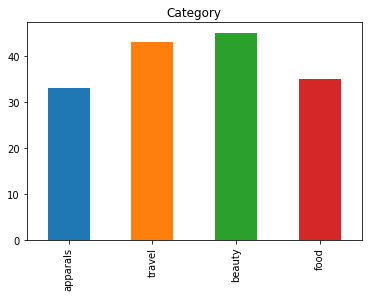

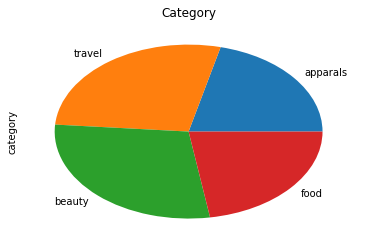

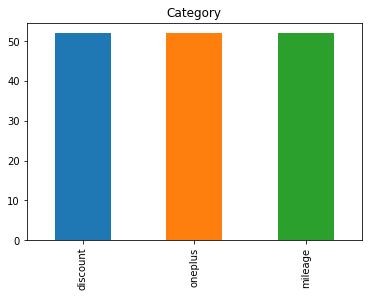

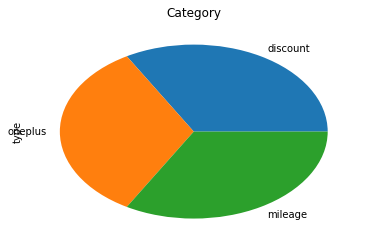

In [24]:
plt.figure(0)
category_fq.plot(kind='bar', title=u'Category')
plt.figure(1)
category_fq.plot(kind='pie', title=u'Category')
plt.figure(2)
type_fq.plot(kind='bar', title=u'Category')
plt.figure(3)
type_fq.plot(kind='pie', title=u'Category')

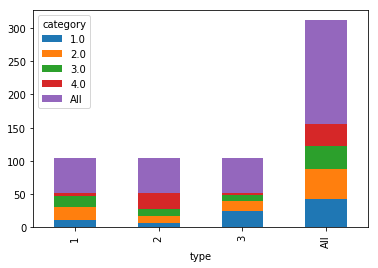

In [25]:
my_df_cross = pd.crosstab(my_df.type, my_df.category, margins=True)
#my_df_cross.columns = category_lables.values()
#my_df_cross.index = type_lables.values()
my_df_cross.plot(kind = 'bar', stacked = 1)

In [29]:
pd.crosstab(my_df.type, my_df.category, margins=False)

category,1.0,2.0,3.0,4.0
type,,,,
1,11,20,16,5
2,7,10,10,25
3,25,15,9,3


In [30]:
pd.crosstab(my_df.type, my_df.category, margins=False, normalize='index')

category,1.0,2.0,3.0,4.0
type,,,,
1,0.211538,0.384615,0.307692,0.096154
2,0.134615,0.192308,0.192308,0.480769
3,0.480769,0.288462,0.173077,0.057692


In [31]:
stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
(a, b, c, d) = stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
print('Chi = %4.3f, p-value = %4.3f, df = %0.0d'% (a, b, c))

Chi = 45.165, p-value = 0.000, df = 12


## end of documents